In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

#Data Analysis

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df["label"].nunique()

22

In [44]:
df.tail(20)

,N,P,K,temperature,humidity,ph,rainfall,label
2180,80,18,31,24.029525,58.848806,7.303033,134.680397,coffee
2181,101,31,26,26.708975,69.711841,6.861235,158.860889,coffee
2182,103,33,33,26.717174,50.501485,7.131436,126.807398,coffee
2183,93,26,27,24.592457,56.468296,7.288212,137.704405,coffee
2184,104,35,28,27.510061,50.666872,6.983732,143.995555,coffee
2185,116,36,25,27.578476,58.525343,6.172090,156.681037,coffee
2186,107,38,29,26.650693,57.566957,6.351182,145.105065,coffee
2187,101,33,33,26.972516,62.018363,6.908671,142.861079,coffee
2188,107,31,31,23.171246,52.978412,6.766184,153.120164,coffee
2189,99,16,30,23.526521,65.443409,6.392792,186.172820,coffee


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.shape

(2200, 8)

In [8]:
df.size

17600

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

<AxesSubplot:>

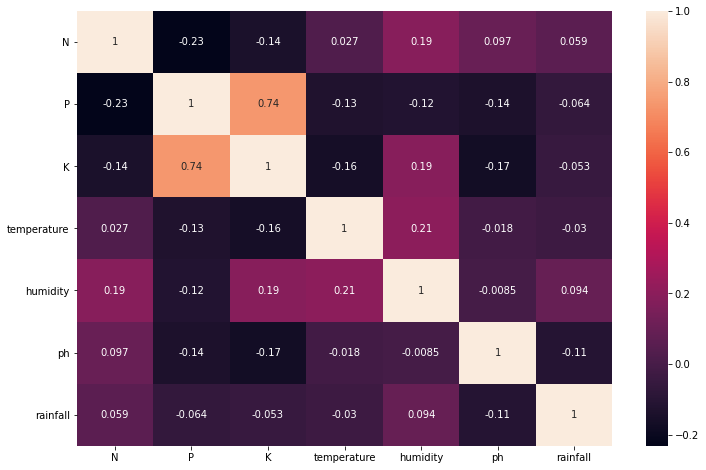

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

#Seperating features and target label 

In [13]:
features = df[['N','P','K','temperature','humidity','ph','rainfall']]

In [14]:
target = df['label']
labels = df['label']

In [15]:
acc=[]
model = []

#Splitting into train and test data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(features,target,random_state=42,test_size=0.3)

#Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)
dt.fit(xtrain,ytrain)
predicted_values = dt.predict(xtest)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(ytest,predicted_values))

DecisionTrees's Accuracy is:  86.81818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.57      1.00      0.72        26
    chickpea       1.00      0.97      0.99        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.71      0.94      0.81        34
 kidneybeans       0.00      0.00      0.00        36
      lentil       0.50      1.00      0.67        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       0.00      0.00      0.00        34
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00

C:\Users\abdou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
score = cross_val_score(dt, features, target,cv=5)
score

array([0.93636364, 0.91136364, 0.92045455, 0.87272727, 0.93636364])

#Saving trained Decision Tree model

In [21]:
import pickle as pk
pk.dump(dt,open('Deceision Tree','wb'))

#Guassian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

gnb.fit(xtrain,ytrain)

predicted_values = gnb.predict(xtest)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.89      1.00      0.94        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00 

In [23]:
score = cross_val_score(gnb,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [24]:
pk.dump(gnb,open('Guassian Naive Bayes','wb'))

#Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)
# transform testing dataabs
x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
predicted_values = SVM.predict(x_test_norm)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

SVM's Accuracy is:  0.9681818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.93      1.00      0.96        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      0.93      0.97        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.73      0.97      0.84        34
 kidneybeans       0.97      1.00      0.99        36
      lentil       0.91      0.95      0.93        22
       maize       1.00      0.96      0.98        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.97      0.94      0.96        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.0

In [26]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [27]:
pk.dump(SVM,open('SVM','wb'))

#Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(xtrain,ytrain)

predicted_values = LogReg.predict(xtest)

x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

Logistic Regression's Accuracy is:  0.946969696969697
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       0.76      0.85      0.80        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       0.87      0.96      0.92        28
      grapes       1.00      1.00      1.00        23
        jute       0.81      0.88      0.85        34
 kidneybeans       1.00      0.97      0.99        36
      lentil       0.91      0.91      0.91        22
       maize       0.95      0.77      0.85        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.90      0.82      0.86        34
    mungbean       0.94      1.00      0.97        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00    

C:\Users\abdou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
pk.dump(LogReg,open('LogisticRegression','wb'))

#Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(xtrain,ytrain)

predicted_values = RF.predict(xtest)

x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

RF's Accuracy is:  0.9924242424242424


#Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

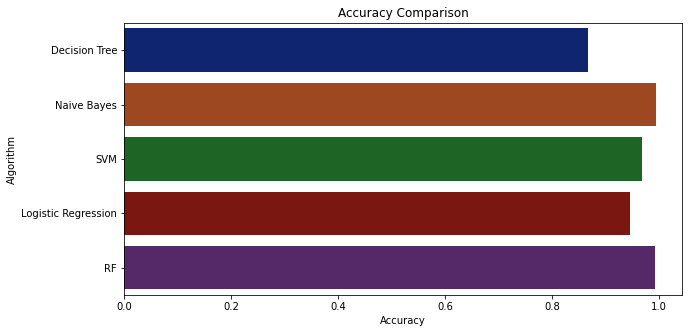

In [31]:
plt.figure(figsize=[10,5])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [32]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8681818181818182
Naive Bayes --> 0.9939393939393939
SVM --> 0.9681818181818181
Logistic Regression --> 0.946969696969697
RF --> 0.9924242424242424


#Making a prediction

In [33]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [35]:
import pickle

In [39]:
print("22")
# Load the saved model
loaded_model = pickle.load(open('Guassian Naive Bayes', 'rb'))

22


In [40]:
# New data for prediction
mydata = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])

# Make predictions
predictions = loaded_model.predict(mydata)

# Print the predictions
print("Predictions:", predictions)

Predictions: ['coffee']


In [43]:
predictions[0]

'coffee'

In [34]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


#Gradio deployment

In [38]:
!pip install gradio

ERROR! Session/line number was not unique in database. History logging moved to new session 240


In [ ]:
import gradio as gr
print("hhh")

ERROR! Session/line number was not unique in database. History logging moved to new session 241


In [36]:
def crop_recom(N,P,K,tem,hum,ph,rain):
    crop = RF.predict([[N,P,K,tem,hum,ph,rain]])
    return crop
    

ERROR! Session/line number was not unique in database. History logging moved to new session 238


In [37]:
crop_recom(83, 45, 60, 28, 70.3, 7.0, 150.9)

array(['jute'], dtype=object)

ERROR! Session/line number was not unique in database. History logging moved to new session 239


In [ ]:
interface = gr.Interface(
  fn =crop_recom, #function
  inputs = ['number','number','number','number','number','number','number'],
  outputs = ['text']  


).launch(share=False)